In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [3]:
df = pd.read_csv(r'D:\bengaluru_house_prices.csv')
df.head(8)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00


In [4]:
df1= df.drop(['area_type','availability','society','balcony'],axis= 'columns')

In [5]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df.shape

(13320, 9)

In [7]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [8]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [10]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df1.shape

(13320, 5)

In [12]:
df2=df1.dropna()
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
def remove_str(x):
    length = len(x.split(' '))
    if (length==2):
        return int(x.split(' ')[0])


In [15]:
df2['size']=df2['size'].apply(remove_str)

<ipython-input-15-735e36174fec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['size']=df2['size'].apply(remove_str)


In [16]:
df2['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df2['bhk']= df2['size']

<ipython-input-17-494f40932b8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']= df2['size']


In [18]:
df2.drop('size',axis = 'columns')
df2.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2,1056,2.0,39.07,2
1,Chikka Tirupathi,4,2600,5.0,120.00,4
2,Uttarahalli,3,1440,2.0,62.00,3
3,Lingadheeranahalli,3,1521,3.0,95.00,3
4,Kothanur,2,1200,2.0,51.00,2


In [19]:
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [20]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
df2['total_sqft'] = df['total_sqft']

<ipython-input-22-f23f635a209a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft'] = df['total_sqft']


In [23]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
df3=df2.copy()

In [25]:
df3['total_sqft']= df3['total_sqft'].apply(convert_sqft_to_num)

In [26]:
df3.head(9)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4
2,Uttarahalli,3,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3,1521.0,3.0,95.00,3
4,Kothanur,2,1200.0,2.0,51.00,2
5,Whitefield,2,1170.0,2.0,38.00,2
6,Old Airport Road,4,2732.0,4.0,204.00,4
7,Rajaji Nagar,4,3300.0,4.0,600.00,4
8,Marathahalli,3,1310.0,3.0,63.25,3


In [27]:
df3.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [28]:
df4 = df3.copy()

In [29]:
df4['price_per_sqft']= (df4['price']*100000/df4['total_sqft'])
df4.head(12)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6,1020.0,6.0,370.00,6,36274.509804


In [30]:
#strip is used to remove spaces in column
df4.location =df4.location.apply(lambda x: x.strip())

location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [31]:
len(location_stats[location_stats<=10])

1052

In [32]:
df4['location']= df['location']

In [33]:
len(df4.location.unique())

1304

In [34]:
less_than_10 = len(location_stats[location_stats<=10])

In [35]:
df4.location = df4.location.apply(lambda x: 'other' if less_than_10 else x)

In [36]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,other,2,1056.0,2.0,39.07,2,3699.810606
1,other,4,2600.0,5.0,120.00,4,4615.384615
2,other,3,1440.0,2.0,62.00,3,4305.555556
3,other,3,1521.0,3.0,95.00,3,6245.890861
4,other,2,1200.0,2.0,51.00,2,4250.000000
5,other,2,1170.0,2.0,38.00,2,3247.863248
6,other,4,2732.0,4.0,204.00,4,7467.057101
7,other,4,3300.0,4.0,600.00,4,18181.818182
8,other,3,1310.0,3.0,63.25,3,4828.244275
9,other,6,1020.0,6.0,370.00,6,36274.509804


In [37]:
df4['location']= df['location']

In [38]:
len(df4.location.unique())

1304

In [39]:
#strip is used to remove spaces in column
df4.location =df4.location.apply(lambda x: x.strip())


location_stats = df4['location'].value_counts(ascending=False)
location_stats

Whitefield                535
Sarjapur  Road            392
Electronic City           304
Kanakpura Road            266
Thanisandra               236
                         ... 
Jay an agar 4 T Block       1
Rainbow Drive               1
rr nagar                    1
Nrupathunga Nagar           1
Ncpr Industrial Layout      1
Name: location, Length: 1293, dtype: int64

In [40]:
less_than_10 = len([location_stats>25])
less_than_10

1

In [41]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6,1020.0,6.0,370.00,6,36274.509804


In [42]:
#strip is used to remove spaces in column
df4.location =df4.location.apply(lambda x: x.strip())


location_stats = df4['location'].value_counts(ascending=False)
location_stats

Whitefield                535
Sarjapur  Road            392
Electronic City           304
Kanakpura Road            266
Thanisandra               236
                         ... 
Jay an agar 4 T Block       1
Rainbow Drive               1
rr nagar                    1
Nrupathunga Nagar           1
Ncpr Industrial Layout      1
Name: location, Length: 1293, dtype: int64

In [43]:

len(location_stats[location_stats<=10])

1052

In [44]:
less_10= (location_stats[location_stats<=10])

In [45]:
len(less_10)

1052

In [46]:
df4.head(12)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6,1020.0,6.0,370.00,6,36274.509804


In [47]:
df4.location = df4.location.apply(lambda x: 'other' if x in less_10 else x)
len(df4.location.unique())

242

In [48]:
df4.head(15)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3,1310.0,3.0,63.25,3,4828.244275
9,other,6,1020.0,6.0,370.00,6,36274.509804


In [49]:
#We will intake column only with price_per_sqft>(mean - sd) & price_per_sqft <= (mean + sd)
#Outlier Removal
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out      

In [50]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 7)

In [51]:
df5.head(8)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,600.00,4,18181.818182


In [52]:
df6 =remove_pps_outliers(df5)

In [53]:
df6.shape

(10241, 7)

In [54]:
df6.head(8)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,4,2825.0,4.0,250.0,4,8849.557522


In [55]:
df6.head(6)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4,2750.0,4.0,413.0,4,15018.181818


In [56]:
len(df6.location.unique())

242

In [57]:
def scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
    

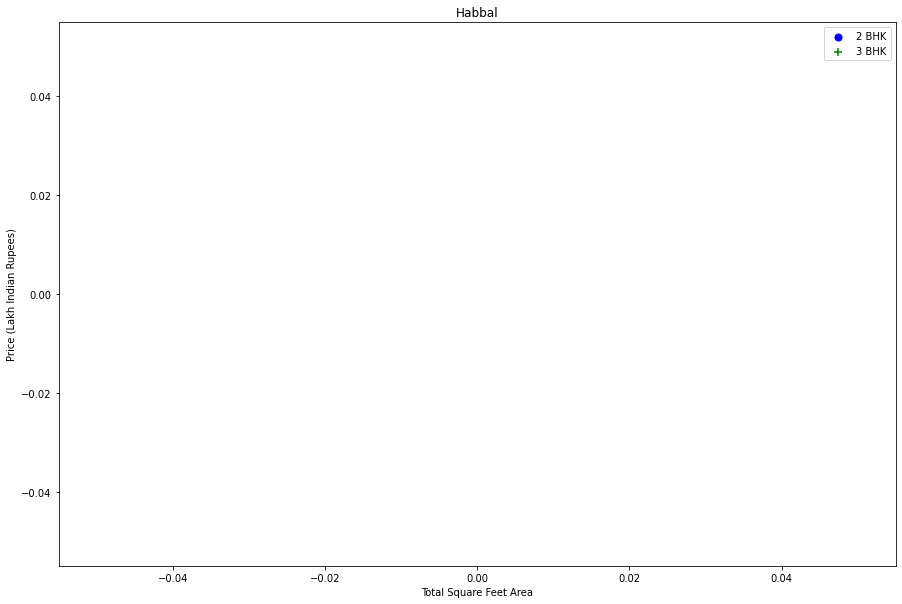

In [58]:
scatter_chart(df6,"Habbal")

In [59]:
len(df6.location=='Habbal')

10241

In [60]:
#We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

#{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}#
#Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

IndentationError: unexpected indent (<ipython-input-60-d5daf299082f>, line 4)

In [61]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [62]:
df7 = remove_bhk_outliers(df6)

In [63]:
df7.shape

(7329, 7)

Text(0, 0.5, 'count')

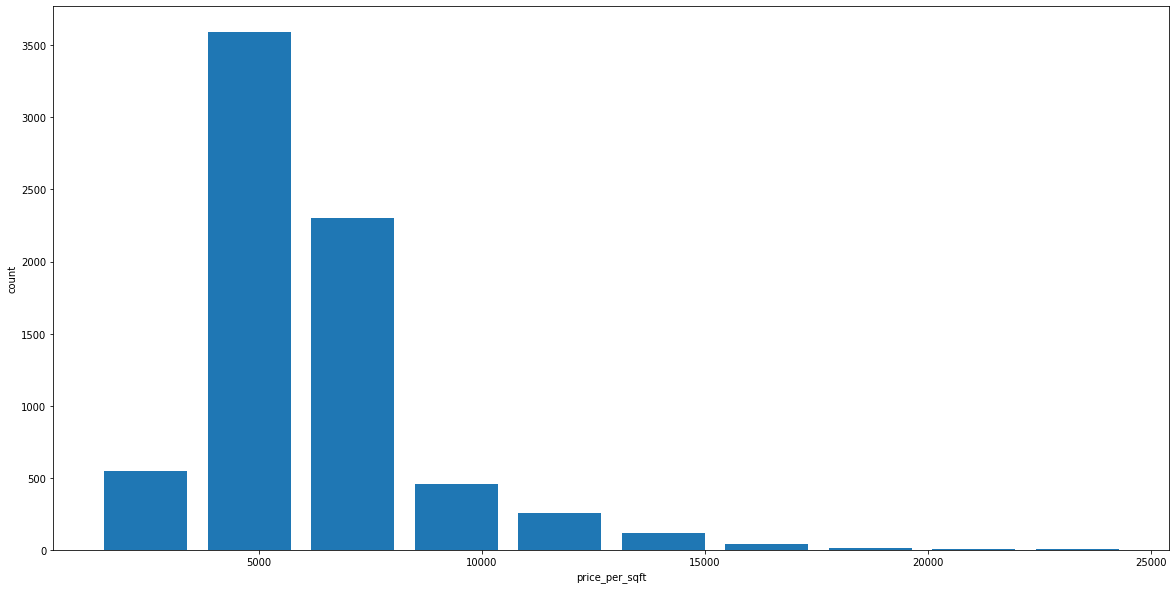

In [64]:
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

In [65]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [66]:
len(df7[df7.bath>df7.bhk+2])

4

In [67]:
df8=df7[df7.bath<df7.bhk+2]

In [68]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  6.,  8.,  7.,  9., 16., 12., 13.])

In [69]:
df8.shape

(7251, 7)

In [70]:
df8.head(6)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4,2750.0,4.0,413.0,4,15018.181818


In [71]:
df9=df8.drop('price_per_sqft',axis='columns')
df9.head(5)

,location,size,total_sqft,bath,price,bhk
0,1st Block Jayanagar,4,2850.0,4.0,428.0,4
1,1st Block Jayanagar,3,1630.0,3.0,194.0,3
2,1st Block Jayanagar,3,1875.0,2.0,235.0,3
3,1st Block Jayanagar,3,1200.0,2.0,130.0,3
4,1st Block Jayanagar,2,1235.0,2.0,148.0,2


In [72]:
dummies = pd.get_dummies(df9.location)

In [73]:
dummies.head(8)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df10=pd.concat([df9,dummies.drop('other',axis ='columns')],axis='columns')

In [75]:
df10.head(3)

,location,size,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4,2850.0,4.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3,1630.0,3.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3,1875.0,2.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df10=df10.drop('location',axis = 'columns')

In [77]:
df10.head(2)

,size,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
x = df10.drop('price',axis='columns')
y= df10.price

In [79]:
x.head(2)

,size,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [82]:
len(x_train)

5075

In [83]:
len(x_test)

2176

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [86]:
lr.score(x_train,y_train)

0.837766274306979

In [87]:
lr.score(x_test,y_test)

0.8793470842675779

In [88]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.split(x_train,y_train)

<generator object _BaseKFold.split at 0x152B6F08>

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
cross_val_score(LinearRegression(),x_train,y_train,cv=cv)

NameError: name 'cv' is not defined

In [ ]:
x.head(5)

In [91]:
x['total_sqft']=x['total_sqft'].astype(int)
x['bath']=x['bath'].astype(int)

In [92]:

x.head(4)

,size,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850,4,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875,2,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200,2,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
#To covert float to int...float values are not excepted
y = y.astype(int)

In [94]:
y.head(4)

0    428
1    194
2    235
3    130
Name: price, dtype: int32

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import ShuffleSplit

In [97]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.818563,{'normalize': True}
1,lasso,0.687441,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.723956,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [108]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lr.predict([X])[0]

In [109]:
predict_price ("1st Phase JP Nagar",2000,2,1)

-4225.484874268011

In [110]:
predict_price ("Vittasandra",4000,4,2)

-8499.250426631652

In [111]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [112]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))